# PspNet Semantic Segmentation

#### General Workflow:
1. Load Google street view images
2. Segment the images
3. Save results to a .csv

# If you do not have mxnet installed (or any other package)
1. pip install packageName
2. pip install --upgrade packageName
3. Example: pip install mxnet


### Defining the Color Pallete for different street features

In [1]:
# Defining Colour Pallete
from collections import namedtuple
import scipy.io
Label = namedtuple('Label', ['name','id','color'])  # Colour is in RGB format
labels_ade = [Label('wall', 0, (120, 120, 120)),
        Label('building', 1, (180, 120, 120)),
        Label('sky', 2, (6, 230, 230)),
        Label('floor', 3, (80, 50, 50)),
        Label('tree', 4, (4, 200, 3)),
        Label('ceiling', 5, (120, 120, 80)),
        Label('road', 6, (140, 140, 140)),
        Label('bed', 7, (204, 5, 255)),
        Label('windowpane', 8, (230, 230, 230)),
        Label('grass', 9, (4, 250, 7)),
        Label('cabinet', 10, (224, 5, 255)),
        Label('sidewalk', 11, (235, 255, 7)),
        Label('person', 12, (150, 5, 61)),
        Label('earth', 13, (120, 120, 70)),
        Label('door', 14, (8, 255, 51)),
        Label('table', 15, (255, 6, 82)),
        Label('mountain', 16, (143, 255, 140)),
        Label('plant', 17, (204, 255, 4)),
        Label('curtain', 18, (255, 51, 7)),
        Label('chair', 19, (204, 70, 3)),
        Label('car', 20, (0, 102, 200)),
        Label('water', 21, (61, 230, 250)),
        Label('painting', 22, (255, 6, 51)),
        Label('sofa', 23, (11, 102, 255)),
        Label('shelf', 24, (255, 7, 71)),
        Label('house', 25, (255, 9, 224)),
        Label('sea', 26, (9, 7, 230)),
        Label('mirror', 27, (220, 220, 220)),
        Label('rug', 28, (255, 9, 92)),
        Label('field', 29, (112, 9, 255)),
        Label('armchair', 30, (8, 255, 214)),
        Label('seat', 31, (7, 255, 224)),
        Label('fence', 32, (255, 184, 6)),
        Label('desk', 33, (10, 255, 71)),
        Label('rock', 34, (255, 41, 10)),
        Label('wardrobe', 35, (7, 255, 255)),
        Label('lamp', 36, (224, 255, 8)),
        Label('bathtub', 37, (102, 8, 255)),
        Label('railing', 38, (255, 61, 6)),
        Label('cushion', 39, (255, 194, 7)),
        Label('base', 40, (255, 122, 8)),
        Label('box', 41, (0, 255, 20)),
        Label('column', 42, (255, 8, 41)),
        Label('signboard', 43, (255, 5, 153)),
        Label('chest of drawers', 44, (6, 51, 255)),
        Label('counter', 45, (235, 12, 255)),
        Label('sand', 46, (160, 150, 20)),
        Label('sink', 47, (0, 163, 255)),
        Label('skyscraper', 48, (140, 140, 140)),
        Label('fireplace', 49, (250, 10, 15)),
        Label('refrigerator', 50, (20, 255, 0)),
        Label('grandstand', 51, (31, 255, 0)),
        Label('path', 52, (255, 31, 0)),
        Label('stairs', 53, (255, 224, 0)),
        Label('runway', 54, (153, 255, 0)),
        Label('case', 55, (0, 0, 255)),
        Label('pool table', 56, (255, 71, 0)),
        Label('pillow', 57, (0, 235, 255)),
        Label('screen door', 58, (0, 173, 255)),
        Label('stairway', 59, (31, 0, 255)),
        Label('river', 60, (11, 200, 200)),
        Label('bridge', 61, (255, 82, 0)),
        Label('bookcase', 62, (0, 255, 245)),
        Label('blind', 63, (0, 61, 255)),
        Label('coffee table', 64, (0, 255, 112)),
        Label('toilet', 65, (0, 255, 133)),
        Label('flower', 66, (255, 0, 0)),
        Label('book', 67, (255, 163, 0)),
        Label('hill', 68, (255, 102, 0)),
        Label('bench', 69, (194, 255, 0)),
        Label('countertop', 70, (0, 143, 255)),
        Label('stove', 71, (51, 255, 0)),
        Label('palm', 72, (0, 82, 255)),
        Label('kitchen island', 73, (0, 255, 41)),
        Label('computer', 74, (0, 255, 173)),
        Label('swivel chair', 75, (10, 0, 255)),
        Label('boat', 76, (173, 255, 0)),
        Label('bar', 77, (0, 255, 153)),
        Label('arcade machine', 78, (255, 92, 0)),
        Label('hovel', 79, (255, 0, 255)),
        Label('bus', 80, (255, 0, 245)),
        Label('towel', 81, (255, 0, 102)),
        Label('light', 82, (255, 173, 0)),
        Label('truck', 83, (255, 0, 20)),
        Label('tower', 84, (255, 184, 184)),
        Label('chandelier', 85, (0, 31, 255)),
        Label('awning', 86, (0, 255, 61)),
        Label('streetlight', 87, (0, 71, 255)),
        Label('booth', 88, (255, 0, 204)),
        Label('television receiver', 89, (0, 255, 194)),
        Label('airplane', 90, (0, 255, 82)),
        Label('dirt track', 91, (0, 10, 255)),
        Label('apparel', 92, (0, 112, 255)),
        Label('pole', 93, (51, 0, 255)),
        Label('land', 94, (0, 194, 255)),
        Label('bannister', 95, (0, 122, 255)),
        Label('escalator', 96, (0, 255, 163)),
        Label('ottoman', 97, (255, 153, 0)),
        Label('bottle', 98, (0, 255, 10)),
        Label('buffet', 99, (255, 112, 0)),
        Label('poster', 100, (143, 255, 0)),
        Label('stage', 101, (82, 0, 255)),
        Label('van', 102, (163, 255, 0)),
        Label('ship', 103, (255, 235, 0)),
        Label('fountain', 104, (8, 184, 170)),
        Label('conveyer belt', 105, (133, 0, 255)),
        Label('canopy', 106, (0, 255, 92)),
        Label('washer', 107, (184, 0, 255)),
        Label('plaything', 108, (255, 0, 31)),
        Label('swimming pool', 109, (0, 184, 255)),
        Label('stool', 110, (0, 214, 255)),
        Label('barrel', 111, (255, 0, 112)),
        Label('basket', 112, (92, 255, 0)),
        Label('waterfall', 113, (0, 224, 255)),
        Label('tent', 114, (112, 224, 255)),
        Label('bag', 115, (70, 184, 160)),
        Label('minibike', 116, (163, 0, 255)),
        Label('cradle', 117, (153, 0, 255)),
        Label('oven', 118, (71, 255, 0)),
        Label('ball', 119, (255, 0, 163)),
        Label('food', 120, (255, 204, 0)),
        Label('step', 121, (255, 0, 143)),
        Label('tank', 122, (0, 255, 235)),
        Label('trade name', 123, (133, 255, 0)),
        Label('microwave', 124, (255, 0, 235)),
        Label('pot', 125, (245, 0, 255)),
        Label('animal', 126, (255, 0, 122)),
        Label('bicycle', 127, (255, 245, 0)),
        Label('lake', 128, (10, 190, 212)),
        Label('dishwasher', 129, (214, 255, 0)),
        Label('screen', 130, (0, 204, 255)),
        Label('blanket', 131, (20, 0, 255)),
        Label('sculpture', 132, (255, 255, 0)),
        Label('hood', 133, (0, 153, 255)),
        Label('sconce', 134, (0, 41, 255)),
        Label('vase', 135, (0, 255, 204)),
        Label('traffic light', 136, (41, 0, 255)),
        Label('tray', 137, (41, 255, 0)),
        Label('ashcan', 138, (173, 0, 255)),
        Label('fan', 139, (0, 245, 255)),
        Label('pier', 140, (71, 0, 255)),
        Label('crt screen', 141, (122, 0, 255)),
        Label('plate', 142, (0, 255, 184)),
        Label('monitor', 143, (0, 92, 255)),
        Label('bulletin board', 144, (184, 255, 0)),
        Label('shower', 145, (0, 133, 255)),
        Label('radiator', 146, (255, 214, 0)),
        Label('glass', 147, (25, 194, 194)),
        Label('clock', 148, (102, 255, 0)),
        Label('flag', 149, (92, 0, 255))]

labels_citys = [
    #     name id trainId  category catId  hasInstances ignoreInEval  color
    Label('unlabeled',  0,  (0,  0,  0)),
    Label('ego vehicle',  1,    (0,  0,  0)),
    Label('rectification border',  2,   (0,  0,  0)),
    Label('out of roi',  3,     (0,  0,  0)),
    Label('static',  4,     (0,  0,  0)),
    Label('dynamic',  5,    (111, 74,  0)),
    Label('ground',  6,     (81,  0, 81)),
    Label('road',  7,       (128, 64, 128)),
    Label('sidewalk',  8,   (244, 35, 232)),
    Label('parking',  9,      (250, 170, 160)),
    Label('rail track', 10,      (230, 150, 140)),
    Label('building', 11,        (70, 70, 70)),
    Label('wall', 12,        (102, 102, 156)),
    Label('fence', 13,        (190, 153, 153)),
    Label('guard rail', 14,      (180, 165, 180)),
    Label('bridge', 15,      (150, 100, 100)),
    Label('tunnel', 16,      (150, 120, 90)),
    Label('pole', 17,        (153, 153, 153)),
    Label('polegroup', 18,      (153, 153, 153)),
    Label('traffic light', 19,        (250, 170, 30)),
    Label('traffic sign', 20,        (220, 220,  0)),
    Label('vegetation', 21,        (107, 142, 35)),
    Label('terrain', 22,    (152, 251, 152)),
    Label('sky', 23,(70, 130, 180)),
    Label('person', 24,(220, 20, 60)),
    Label('rider', 25,(255,  0,  0)),
    Label('car', 26,(0,  0, 142)),
    Label('truck', 27,(0,  0, 70)),
    Label('bus', 28, (0, 60, 100)),
    Label('caravan', 29,(0,  0, 90)),
    Label('trailer', 30,(0,  0, 110)),
    Label('train', 31, (0, 80, 100)),
    Label('motorcycle', 32,(0,  0, 230)),
    Label('bicycle', 33, (119, 11, 32)),
    Label('license plate', -1, (0,  0, 142)),
]

ade20k_id2label = {label.id: label for label in labels_ade}
citys_id2label = {label.id: label for label in labels_citys}

### 2. Generate the downloaded jpg list

### ! Please Check before running the following cell !
#### Your previously downloaded Google API images should be copied into your week 2 folder.

OPTIONAL: If it is in any other folder, the folder need to be in the same directory as this code, and change the folder name in the code below

In [2]:
# Image path config
path="Images/" # Change the path to the folder where you put Street view images
print("Photo path is: %s"%(path))

Photo path is: Images/


If everything is working the cell below should show how many images are in the folder and the name of the first two images.

In [3]:
# Generate jpg list
from os import listdir
from mxnet import image
from os.path import isfile, join
import pandas as pd

all_files = [f for f in listdir(path)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()

#print(jpg_files) 
print("1.Image Files in the folder:",len(jpg_files))

#show the first three images
print(jpg_files[0:3])

1.Image Files in the folder: 4
['15730.jpg', '16565.jpg', '5219.jpg']


### 2.1 Test whether the images can be called and what are there format

If everything is working the cell below should show image shape: (400, 640, 3)

In [4]:
### 2.1 Get image
for filename in jpg_files[1:2]:
    print((filename.split('.')[0]))
    ### 1.Read the jpg file
    img = image.imread(path+filename)
    print(filename,'image shape:',img.shape)

16565
16565.jpg image shape: (400, 640, 3)


### 3.Apply PSPNet to images and generate a csv

In [5]:
# Apply PSPNET to images and generate a .csv
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches 
from matplotlib.font_manager import FontProperties
import numpy as np
import collections
from gluoncv.utils.viz import get_color_pallete

# Define the features you want to detect
keywords=['mountain','water','lake','sky','bridge','pier',
          'ceiling','building','skyscraper','wall','fence','windowpane','glass',
          'tree','grass','plant','road','sidewalk','earth',
          'person','minibike','bicycle','car','van',
          'sofa','chair','booth','fountain','railing','signboard','column','awning','desk','lamp',
          'streetlight','sculpture','ashcan','bulletin board']



### ! PLEASE CHECK BEFORE RUNNING FOLLOWING CELL !

Make sure you have created a folder to save processed segmentation results without lables

Also, you have created a separate folder to save processed segmentation result WITH lables

Remember to set path_out and path_out_lgd to the respective folders

In [6]:
# Process Using CPU, and Define Folders to save in
ctx = mx.cpu(0)
path_out="PSPOutClear/"   # The Folder you put segment results without lables
path_out_lgd="PSPOutLabeled/"   # The Folder you put segment results with a legend

# Define a dataframe to save analysis results
df_pspnet=pd.DataFrame()

# Get pre-trained model | PSPNET Cityscape
model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)
# Set up legend font
fontP = FontProperties()
fontP.set_size('x-small') 
#print(jpg_files) 
print("1.Image Files in the folder:",len(jpg_files))

100121KB [00:03, 26823.98KB/s]                           


self.crop_size 480


100%|██████████| 266773/266773 [00:11<00:00, 23234.16KB/s]


1.Image Files in the folder: 4


### !!! Please check before running the following cell

Change the number assigned to start_image_index, and end_image_index to segment smaller batches of images

Please refer to the output from cells above for the numbers of available images in your folder

*** 	 Reading file:16565.jpg 	Going through: 1 / 3


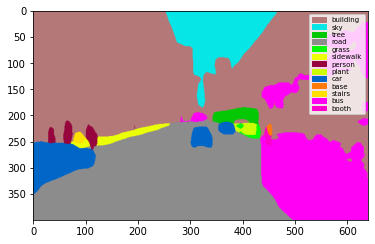

*** 	 Reading file:5219.jpg 	Going through: 2 / 3


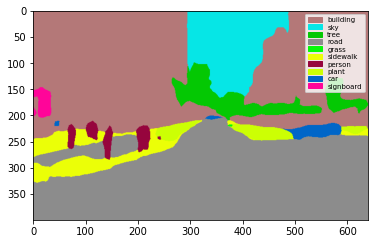

*** 	 Reading file:6829.jpg 	Going through: 3 / 3


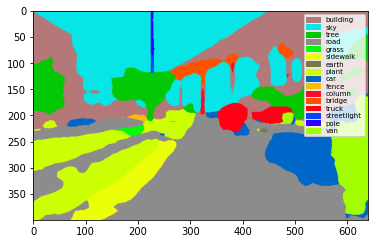

-------All Done! please remeber to run the last cell to clean up your data----------


,FID,building,sky,tree,road,grass,sidewalk,person,plant,car,booth,signboard,earth,fence,column,bridge,streetlight,van
0,16565,0.468938,0.065414,0.008086,0.248879,0.001695,0.007824,0.006586,0.002855,0.036328,0.001152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5219,0.414938,0.084633,0.048852,0.362926,0.000117,0.043070,0.012258,0.018035,0.009262,NaN,0.00591,NaN,NaN,NaN,NaN,NaN,NaN
2,6829,0.196824,0.211230,0.072117,0.257602,0.002496,0.034027,NaN,0.091969,0.054348,NaN,NaN,0.00032,0.001254,0.00159,0.012109,0.000797,0.045539


In [7]:

# Change file numbers to be segmented
start_image_index = 1    # Images before this index will not be processed, first image in folder is index 0
end_image_index = 4     #the image at & after this index will not be processed


ID=0
for filename in jpg_files[start_image_index:end_image_index]: 
    # 1.Read the jpg file
    img = image.imread(path+filename)
    #print(path+filename,img.shape)
    size=img.shape[0]*img.shape[1]
#     print("1",img.shape)
#     # Display origin image
#     plt.imshow(img.asnumpy())
#     plt.show()    

    # Normalize the image using dataset mean
    transform_fn = transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize([.485, .456, .406], [.229, .224, .225])
    ])
    img = transform_fn(img)
#    print("2",img.shape)
    img = img.expand_dims(0).as_in_context(ctx)
    
    # Start Timer <debug>
#    startTime = datetime.now() # initiate timer
    
    # Apply pre-trained model to the loaded image
    output = model.demo(img)
    
    # Make prediction using single scale
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    
    # Add color pallete for visualization
    mask = get_color_pallete(predict, 'ade20k')
    
    # Save predict outcome
    fileID=(filename.split('.')[0]).split('_')[0]
    print('*** \t Reading file:%s \tGoing through: %d / %d'%(filename,ID+1,end_image_index-start_image_index ))
    mask.save(path_out+fileID+'.png')
    
    # Stop Timer <debug>
    #print("runtime:",datetime.now()-startTime)
    
    # Show the predicted mask | PSPNET
#     mmask = mpimg.imread(path_out+fileID+'.png')
    plt.imshow(mask)
#     plt.show()   

    # Result Analysis and add labels + legend
    # 0:Label, 1:Label ID and 2: Label Color
    unique, counts = np.unique(predict, return_counts=True)
    ratio_dict=dict(zip(unique, counts))
    labelratio_dict={}
    legend_dict={}
    
    # Get Ratio
    for key in ratio_dict.keys():
            #Rescale RGB to (0,1)
            #np.interp(ade20k_id2label[key][2], (0, 255), (0, 1))
            legend_dict[ade20k_id2label[key][0]]=np.round(np.interp(ade20k_id2label[key][2], (0, 255), (0, 1)),6)
            labelratio_dict[ade20k_id2label[key][0]]=round(ratio_dict[key]/size,6)
#     print('1.Index Ratio:',ratio_dict,'\n2.Label Color:',legend_dict)
    
    # Show the predicted mask | PSPNET with Legend Label
#     mmask = mpimg.imread(path_out+fileID+'.png')
#     Display masked image
#     plt.imshow(mmask)

    # Add Legend (will compress images)
    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)
    plt.legend(handles=patchList,loc='best',fontsize='x-small',prop=fontP,labelspacing=0.2)
    plt.savefig(path_out_lgd+fileID+'.png', bbox_inches='tight', dpi=150) # dots per inch
    
    # Display masked image with legend
    plt.show()
#     print (labelratio_dict)        
    df_pspnet.loc[ID,'FID']=fileID
    for key in labelratio_dict.keys():
        if key in keywords:
            df_pspnet.loc[ID,key]=labelratio_dict[key]    
    ID+=1

# Save the segmentation result to a csv in the folder
file_save_name="pspnet_{start}-{end}.csv".format(start=start_image_index, end=end_image_index-1)
df_pspnet.to_csv(file_save_name, index=False, encoding='utf-8')
print("-------All Done! please remeber to run the last cell to clean up your data----------")
df_pspnet.head(3)

### 3.1 Cleaning up the .csv file
#### Important! - Please close the .csv file before running this cell

In [8]:
# 4.1 Read the csv result
df_psp=pd.read_csv(file_save_name, encoding='utf-8', engine='python')

# 4.2 Replace the NaN with 0 using fillna(0), and save the result to a new csv file
df_psp=df_psp.fillna(0)

# save the result to a new csv file
df_psp.to_csv(file_save_name, index=False, encoding='utf-8')

df_psp.head(3)

,FID,building,sky,tree,road,grass,sidewalk,person,plant,car,booth,signboard,earth,fence,column,bridge,streetlight,van
0,16565,0.468938,0.065414,0.008086,0.248879,0.001695,0.007824,0.006586,0.002855,0.036328,0.001152,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
1,5219,0.414938,0.084633,0.048852,0.362926,0.000117,0.043070,0.012258,0.018035,0.009262,0.000000,0.00591,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
2,6829,0.196824,0.211230,0.072117,0.257602,0.002496,0.034027,0.000000,0.091969,0.054348,0.000000,0.00000,0.00032,0.001254,0.00159,0.012109,0.000797,0.045539


# End of week 2 assignment